<a href="https://colab.research.google.com/github/maheshkumar30/Intellipaat-DataScience/blob/main/BootStrapAgreegation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bootstrap Aggregation

Bagging => Boostrap + aggregation

1. Bootstrap Sample => From the original dataset, create many new datasets by random sampling with replacement

Same original size

2. Training multiple models : Train Independent models for each boostrap sample.
3. Aggregation:   

      Classification : Majority voting

      Regression : Average



Why it works:

Each model sees a different dataset

Average reduces the variance

Overfitting goes down

Exxample : Regression

Tree1: 130

Tree2: 90

Tree3: 110

Tree4: 70

Tree5: 100

Aggregation:  (130+90+110+70+100)/5 => 100 => final prediction

Example: Classification

Tree1: Span

Tree2: Not spam

Tree3: Spam

Tree4: Spam

Tree5: Not Spam

Spam = > 3, not spam = 2 , majority => Spam final prediction spam

Bagging Reduces variance:

σ^2 => variance

N number of models

σ^2/N

Works best:

High variance models(Decision tree)

Noisy dataset

Small dataset❌

#Random Forest

Random Forest = Bagging + feature randomness

Step1. Bootstrap Sampling: sampling with replacement

Step2. Train Decision Tree

        One tree per bootstrap sample

        Trees are usually deep

Step3. Feature Randomness

      At each split, trees sees only a random subset of features

Step 4: Aggregation => classification => majority vores, regression => average

Step 5: Final Output=> aggregated result

In [ ]:
# Aspect            Bagging       Random Forest

# Datarandomness        ✅                ✅

# FeatureRandom.        ❌                ✅

# TreeCorrelation      Higher             Lower

# Performance           Good              Better

**Out of Bag(OOB)**  

Why OOB Exists?

Bootstrap sampling picks ~es

Remaing sample ~ 35% , are not used in training that tree

These unused sample = Out of Bag data
 65% unique sampl


How OOB works?

1. Traint T1 =>  sample D1 -> oob1 = data not in d1
2. Repeat for all tree , each data point becomes oob for multiple trees
3. Predicion using OOB data:

      Collect prediction from trees where X was OOB

      Aggregation

      


Cross Validation: Technique to evaluae a model reliably by training and testing it on different parts of same data

HyperParemeters: Settings we choose before training model. They control how the model learns, They are not learned from the data

Decision Tree:

1. max_depth
2. min_samples_split
3. min_samples_leaf

Random Forest

1. n_estimators
2. max_depth
3. min_samples_split
4. min_samples_leaf
5. **max_features**

Grid Search

Grid Search tries all combination of hyperparameters and pick the best one using cross validation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/customer_churn_.csv")

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#check for  null values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


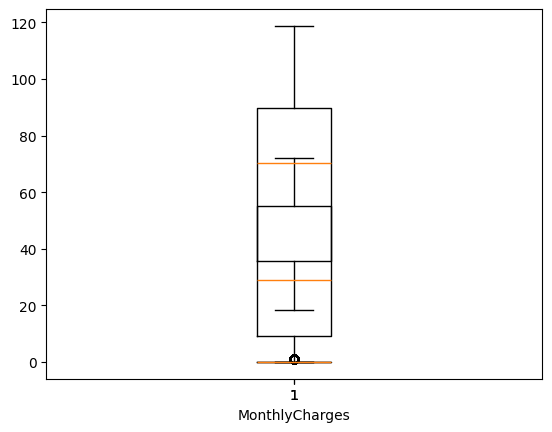

In [ ]:
for col in df.columns:
  if df[col].dtype!="object":
    plt.boxplot(df[col])
    plt.xlabel(col)

In [ ]:
df.drop("customerID",inplace=True,axis=1)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
  if df[col].dtypes=="object":
    df[col] = le.fit_transform(df[col])

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [ ]:
x = df.drop("Churn",axis=1)
y = df['Churn']

In [ ]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [ ]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [ ]:
#Build a model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,test_size=0.20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier1 = RandomForestClassifier(n_estimators=100)
classifier1.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
ypred = classifier1.predict(xtest)

In [ ]:
ypred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(ypred,ytest)

0.794889992902768

In [ ]:
n = [100,150,200,250,300,350,400,450,500]
accuracy = []
for i in n:
  model = RandomForestClassifier(n_estimators=i)
  model.fit(xtrain,ytrain)
  a = accuracy_score(model.predict(xtest),ytest)
  accuracy.append(a)

In [ ]:
d = {
    "Number of trees":n,
    "Accuracy" : accuracy
}
res = pd.DataFrame(d)
res

,Number of trees,Accuracy
0,100,0.794890
1,150,0.799858
2,200,0.799858
3,250,0.795600
4,300,0.803407
5,350,0.802697
6,400,0.799148
7,450,0.803407
8,500,0.795600


In [ ]:
param_grid = {
    "n_estimators" : [300,350,450],
    "max_depth" : [None,5,10],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4],
    "criterion" : ["gini","entropy"]
}

In [ ]:
model = RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    cv = 5,
    scoring = "accuracy",
)

In [ ]:
grid_search.fit(xtrain,ytrain)

SMOTE (Systematic minority oversampling  technique)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resample,y_resample = smote.fit_resample(xtrain,ytrain)


In [ ]:
y_resample.value_counts()


,count
Churn,
0,4138
1,4138


In [ ]:
classifier1 = RandomForestClassifier(n_estimators=100)
classifier1.fit(x_resample,y_resample)

RandomForestClassifier()

In [ ]:
ypred = classifier1.predict(xtest)

In [ ]:
accuracy_score(ypred,ytest)

0.7735982966643009

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(xtrain,ytrain)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
ypred = model.predict(xtest)

In [ ]:
accuracy_score(ypred,ytest)

0.8133427963094393

In [ ]:
model.fit(x_resample,y_resample)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
ypred = model.predict(xtest)

In [ ]:
accuracy_score(ypred,ytest)

0.7679205110007097